In [3]:
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import RegexpTokenizer as regextoken
from nltk.corpus import stopwords
from nltk import FreqDist, bigrams, trigrams
from nltk import WordNetLemmatizer
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import gensim
from gensim.models.keyedvectors import KeyedVectors
import re
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Flatten, Embedding, Conv1D, MaxPooling1D, Dropout, LSTM, GRU
from keras.regularizers import l1, l2
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')


In [4]:
data=pd.read_csv('/content/drive/MyDrive/zomato.csv')

FileNotFoundError: ignored

In [3]:
data.head()

NameError: ignored

In [7]:
res=data.copy(deep=True)

In [8]:
res.head(20)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [9]:
data.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [10]:
data.shape

(51717, 17)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

COLUMNS


In [12]:

data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

NO.OF NULL VALUES IN EACH

In [13]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#dropping the unwanted columns

In [14]:
#data=data.drop(['url','address','phone','dish_liked','menu_item'], axis=1)
#data.head()


In [15]:
data.shape

(51717, 17)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [17]:
#removing duplicates
data.drop_duplicates(inplace=True)
data.shape

(51717, 17)

#ANALYZING ALL THE COLUMNS

In [18]:
#features need to understand Easily so
data.rename(columns={'approx_cost(for two people)':'costfor2plates', 'listed_in(type)':'type', 'listed_in(city)':'city'}, inplace=True)
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,costfor2plates,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#Data cleaning

In [19]:
#rate column
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [20]:
#we have 3 string values we have to remove it(new,nan,-)
def rate(value):
  if(value=='NEW' or value=='-'):
    return np.nan
  else:
    value=str(value).split('/')
    value=value[0]
    return float(value)
data['rate']=data['rate'].apply(rate)
data['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

##Filling null values with mean in rate COLUMNS



In [21]:
data['rate'].fillna(data['rate'].mean(), inplace =True)
data['rate'].isnull().sum()

0

##dropping null values in whole dataset as they are very small

In [22]:
data.dropna(inplace=True)
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,costfor2plates,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [23]:
data.isnull().sum()

url               0
address           0
name              0
online_order      0
book_table        0
rate              0
votes             0
phone             0
location          0
rest_type         0
dish_liked        0
cuisines          0
costfor2plates    0
reviews_list      0
menu_item         0
type              0
city              0
dtype: int64

#we have both city and loaction, lets keep ***one*** ***only***

In [24]:
data=data.drop(['city'], axis=1)


In [25]:
data['costfor2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

#***Removing*** commas because it represents as ***strings***

In [26]:
def removecomma(value):
  value==str(value)
  if "," in value:
    value=value.replace(",", '')
    return float(value)
  else:
    return float(value)
data['costfor2plates']=data['costfor2plates'].apply(removecomma)
data['costfor2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

#cleaning location column

In [27]:
data['location'].value_counts()

Koramangala 5th Block    1784
BTM                      1460
Indiranagar              1350
HSR                      1162
Jayanagar                1047
                         ... 
West Bangalore              2
Rajarajeshwari Nagar        2
Magadi Road                 2
Kanakapura Road             2
KR Puram                    1
Name: location, Length: 88, dtype: int64

#Making a seperate group for locations which are having lessthan 300 restaurants

In [28]:
location=data['location'].value_counts(ascending=False)
location_lessthan300=location[location<300]

In [29]:
def location(value):
  if(value in location_lessthan300):
    return "others"
  else:
    return value
data['location']=data['location'].apply(location)
data['location'].value_counts()

others                   3730
Koramangala 5th Block    1784
BTM                      1460
Indiranagar              1350
HSR                      1162
Jayanagar                1047
JP Nagar                 1025
Whitefield                824
Koramangala 7th Block     725
Koramangala 6th Block     720
Marathahalli              683
Koramangala 4th Block     644
MG Road                   596
Brigade Road              570
Church Street             508
Bannerghatta Road         497
Ulsoor                    477
Koramangala 1st Block     467
Kalyan Nagar              467
Bellandur                 462
Sarjapur Road             456
Lavelle Road              445
Residency Road            442
Banashankari              390
Malleshwaram              366
Richmond Road             351
Cunningham Road           333
Electronic City           327
Brookefield               307
St. Marks Road            304
New BEL Road              303
Name: location, dtype: int64

#Now REST TYPE column

In [30]:
data['rest_type'].value_counts()

Casual Dining                7365
Quick Bites                  5243
Cafe                         2329
Dessert Parlor               1076
Casual Dining, Bar            987
                             ... 
Bar, Pub                        5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Food Court, Casual Dining       1
Dhaba                           1
Name: rest_type, Length: 73, dtype: int64

#Here we can see some types which are very less so we make a group of types which are less than 1000 

In [31]:
rest_types=data["rest_type"].value_counts(ascending=False)
rest_types

Casual Dining                7365
Quick Bites                  5243
Cafe                         2329
Dessert Parlor               1076
Casual Dining, Bar            987
                             ... 
Bar, Pub                        5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Food Court, Casual Dining       1
Dhaba                           1
Name: rest_type, Length: 73, dtype: int64

In [32]:
rest_types_lessthan1000=rest_types[rest_types<1000]
rest_types_lessthan1000

Casual Dining, Bar           987
Delivery                     670
Bar                          357
Takeaway, Delivery           343
Bar, Casual Dining           343
                            ... 
Bar, Pub                       5
Club, Casual Dining            4
Dessert Parlor, Kiosk          2
Food Court, Casual Dining      1
Dhaba                          1
Name: rest_type, Length: 69, dtype: int64

#changing those less than 1000 into others

In [33]:
def rest_type(value):
  if(value in rest_types_lessthan1000):
    return "others"
  else:
    return value
data['rest_type']=data['rest_type'].apply(rest_type)
data['rest_type'].value_counts()

Casual Dining     7365
others            7209
Quick Bites       5243
Cafe              2329
Dessert Parlor    1076
Name: rest_type, dtype: int64

#cleaning cuisines column 

In [34]:
cuisines=data['cuisines'].value_counts(ascending=False)
cuisines_lessthan100=cuisines[cuisines<100]

In [35]:
def cuisines(value):
  if(value in cuisines_lessthan100):
    return "others"
  else:
    return value
data['cuisines']=data['cuisines'].apply(cuisines)
data['cuisines'].value_counts()

others                                              17633
North Indian                                         1144
North Indian, Chinese                                 777
South Indian                                          360
Cafe                                                  273
South Indian, North Indian, Chinese                   233
Bakery, Desserts                                      216
Desserts, Beverages                                   214
Chinese                                               210
Ice Cream, Desserts                                   208
Desserts                                              206
Biryani                                               169
Chinese, Momos                                        162
Finger Food                                           151
Fast Food                                             150
North Indian, Chinese, Biryani                        139
Mithai, Street Food                                   138
North Indian, 

#Type column

In [36]:
data['type'].value_counts()

Delivery              10628
Dine-out               8035
Desserts               1333
Cafes                  1047
Drinks & nightlife      890
Buffet                  762
Pubs and bars           527
Name: type, dtype: int64

In [37]:
type(data.reviews_list[0])

str

In [38]:

# Creating a new dataset that has only customer reviews and restaurant ratings
reviews_data = data[["reviews_list", "rate"]]
# Examining the reviews for the first restaurant in the dataset
reviews_data["reviews_list"][0]
# The text needs cleaning up

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [39]:
# Converting all the text to lowercase
reviews_data["reviews_list"] = reviews_data["reviews_list"].apply(lambda x: x.lower())


In [40]:
# Creating a regular expression tokenizer that matches only alphabets
# This will return separate words (tokens) from the text
tokenizer = regextoken("[a-zA-Z]+") 
# Applying the tokenizer to each row of the reviews
review_tokens = reviews_data["reviews_list"].apply(tokenizer.tokenize)
# Examining the tokens created for the first row / restaurant
print(review_tokens[0])

['rated', 'rated', 'n', 'a', 'beautiful', 'place', 'to', 'dine', 'in', 'the', 'interiors', 'take', 'you', 'back', 'to', 'the', 'mughal', 'era', 'the', 'lightings', 'are', 'just', 'perfect', 'we', 'went', 'there', 'on', 'the', 'occasion', 'of', 'christmas', 'and', 'so', 'they', 'had', 'only', 'limited', 'items', 'available', 'but', 'the', 'taste', 'and', 'service', 'was', 'not', 'compromised', 'at', 'all', 'the', 'only', 'complaint', 'is', 'that', 'the', 'breads', 'could', 'have', 'been', 'better', 'would', 'surely', 'like', 'to', 'come', 'here', 'again', 'rated', 'rated', 'n', 'i', 'was', 'here', 'for', 'dinner', 'with', 'my', 'family', 'on', 'a', 'weekday', 'the', 'restaurant', 'was', 'completely', 'empty', 'ambience', 'is', 'good', 'with', 'some', 'good', 'old', 'hindi', 'music', 'seating', 'arrangement', 'are', 'good', 'too', 'we', 'ordered', 'masala', 'papad', 'panner', 'and', 'baby', 'corn', 'starters', 'lemon', 'and', 'corrionder', 'soup', 'butter', 'roti', 'olive', 'and', 'chill

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
stop = stopwords.words("english")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:

# Adding custom words to stopwords 
stop.extend(["rated", "n", "nan", "x"])
# Removing stopwords from the tokens
review_tokens = review_tokens.apply(lambda x: [token for token in x if token not in stop])

In [44]:
all_reviews = review_tokens.astype(str).str.cat()
cleaned_reviews = tokenizer.tokenize(all_reviews)

In [45]:
fd = FreqDist()
for word in cleaned_reviews:
    fd[word] += 1
    
# Examining the top 5 most frequent words
fd.most_common(5)

[('place', 889011),
 ('good', 830404),
 ('food', 775939),
 ('chicken', 344990),
 ('service', 293068)]

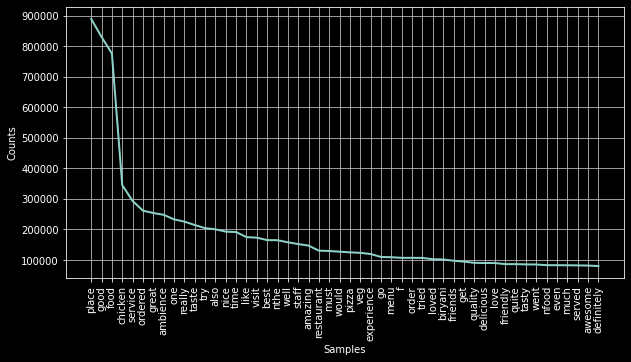

In [46]:
plt.figure(figsize = (10, 5))
fd.plot(50)
plt.show()

#Data cleaning is done, lets see Visualization


#Visualising online order

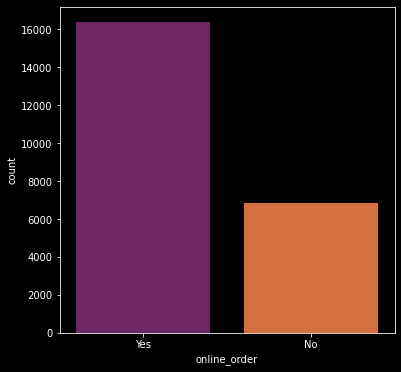

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(data['online_order'], palette='inferno')

#Visualsing book table 

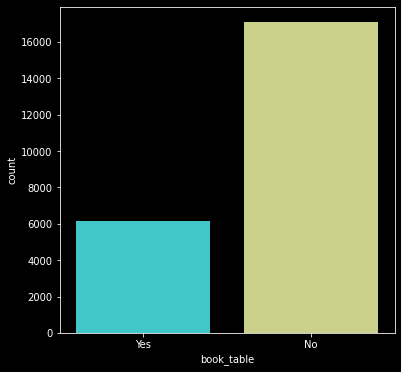

In [48]:
plt.figure(figsize=(6,6))
sns.countplot(data['book_table'], palette= 'rainbow')


This says most of the restaurants not having booking table facility

#Visualising locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

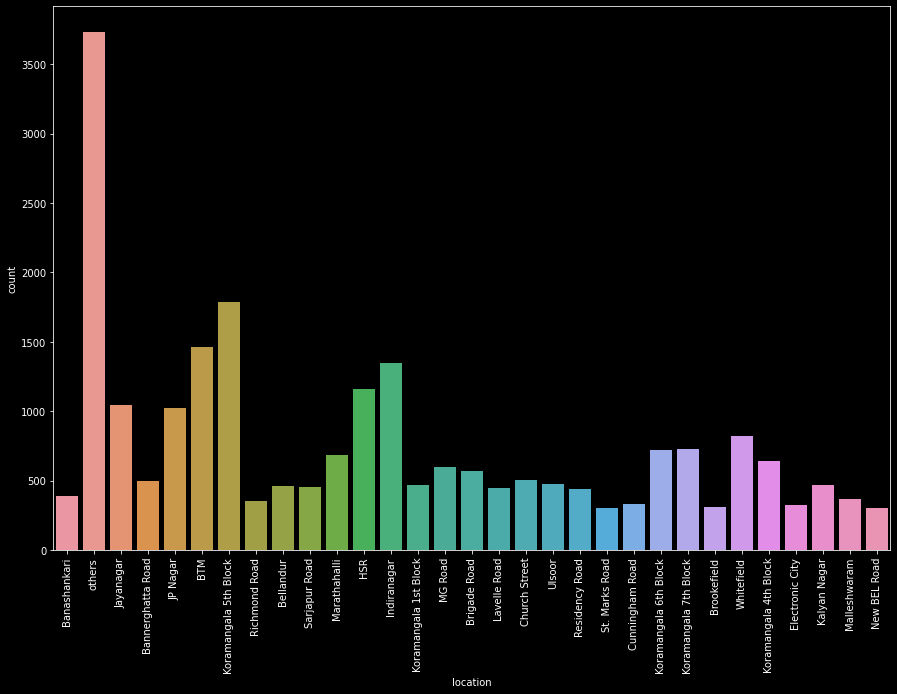

In [49]:
plt.figure(figsize=(15,10))
axis=sns.countplot(data['location'])
plt.xticks(rotation=90)

This says  that which location having no. of restaurants in area

#visualising Book table vs rate 

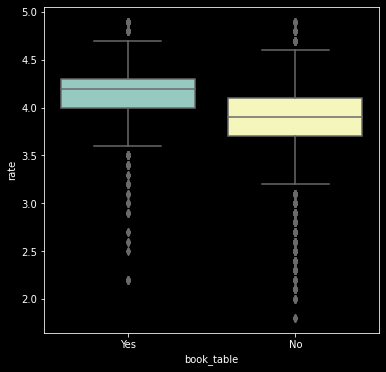

In [50]:
plt.figure(figsize=(6,6))
sns.boxplot(x="book_table",y="rate", data =data)

Here's the difference is high because, restaurants having book table facility rating is higher than restaurants not having book table facility.

#visualising online order

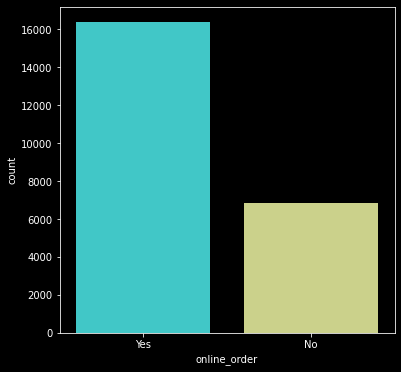

In [51]:
plt.figure(figsize=(6,6))
sns.countplot(data['online_order'], palette='rainbow')

From this we can see that most of them having online order facility.


#visualsing online order vs rate(rating)

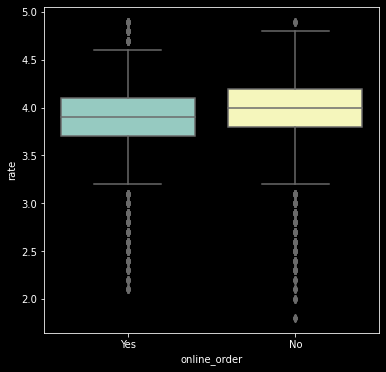

In [52]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=data)

This says that restaurants having online order facility rating is higher than not having online order facility

In [53]:
#visualsing online order facility, location wise

In [54]:
data1=data.groupby(['location','online_order'])['name'].count()
data1.to_csv('location_online.csv')
data1=pd.read_csv('location_online.csv')
data1=pd.pivot_table(data1, values=None, index=['location'], columns=['online_order'],fill_value=0, aggfunc=np.sum)
data1

name      
online_order             No   Yes
location                         
BTM                     267  1193
Banashankari            103   287
Bannerghatta Road       112   385
Bellandur               110   352
Brigade Road            225   345
Brookefield              61   246
Church Street           191   317
Cunningham Road          62   271
Electronic City          98   229
HSR                     151  1011
Indiranagar             398   952
JP Nagar                311   714
Jayanagar               205   842
Kalyan Nagar            126   341
Koramangala 1st Block    57   410
Koramangala 4th Block   254   390
Koramangala 5th Block   554  1230
Koramangala 6th Block   231   489
Koramangala 7th Block   198   527
Lavelle Road            254   191
MG Road                 321   275
Malleshwaram            126   240
Marathahalli            161   522
New BEL Road             64   239
Residency Road          267   175
Richmond Road           202   149
Sarjapur Road           109   347
St. Marks Road          137   167
Ulsoor                  170   307
Whitefield              264   560
others                 1057  2673

This says that which location having no. of online order and not having online order in restaurants

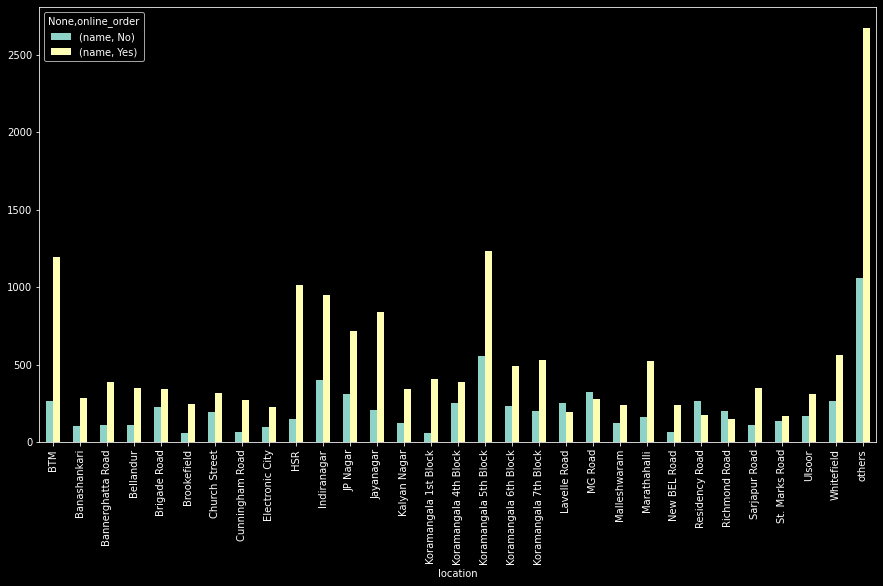

In [55]:
data1.plot(kind='bar', figsize=(15,8))

#visualsing book table facility, location wise

In [56]:
data2=data.groupby(["location","book_table"])["name"].count()
data2.to_csv('location_booktable.csv')
data2=pd.read_csv('location_booktable.csv')
data2=pd.pivot_table(data2, values=None, index=["location"], columns=['book_table'],fill_value=0, aggfunc=np.sum)
data2

name     
book_table               No  Yes
location                        
BTM                    1322  138
Banashankari            335   55
Bannerghatta Road       406   91
Bellandur               366   96
Brigade Road            399  171
Brookefield             239   68
Church Street           326  182
Cunningham Road         164  169
Electronic City         243   84
HSR                     960  202
Indiranagar             916  434
JP Nagar                726  299
Jayanagar               781  266
Kalyan Nagar            331  136
Koramangala 1st Block   417   50
Koramangala 4th Block   334  310
Koramangala 5th Block  1092  692
Koramangala 6th Block   607  113
Koramangala 7th Block   561  164
Lavelle Road            213  232
MG Road                 278  318
Malleshwaram            277   89
Marathahalli            522  161
New BEL Road            251   52
Residency Road          291  151
Richmond Road           235  116
Sarjapur Road           304  152
St. Marks Road          180  124
Ulsoor                  327  150
Whitefield              579  245
others                 3104  626

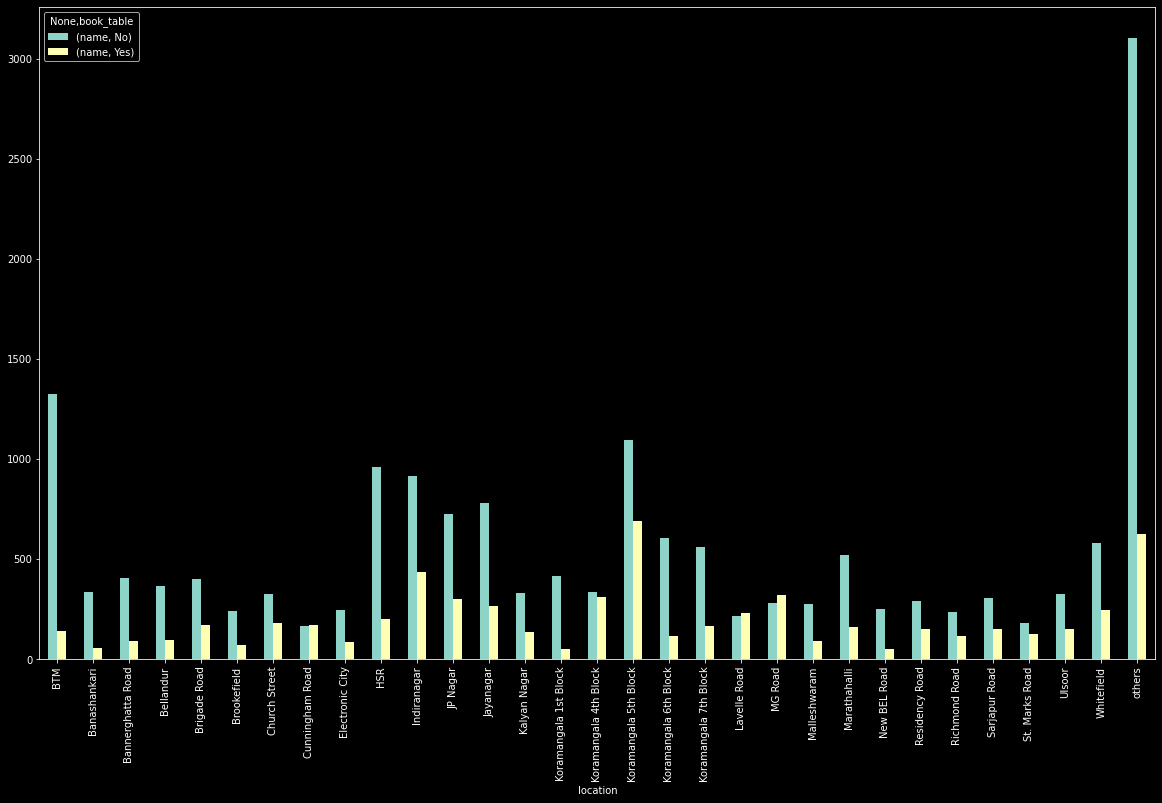

In [57]:
data2.plot(kind='bar', figsize=(20,12))

#Restaurants vs rate

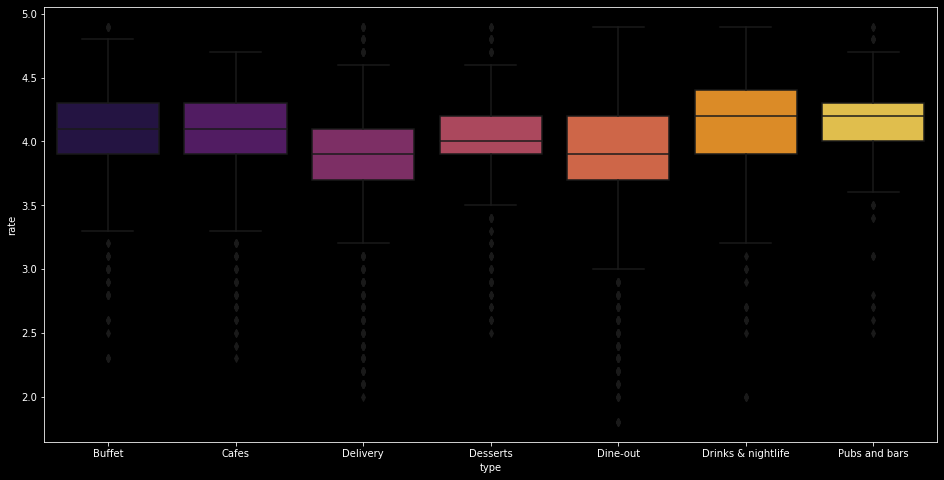

In [58]:
plt.figure(figsize=(16,8))
sns.boxplot(x='type',y='rate', data=data, palette="inferno")

Here we can see that drinks and night life restaurants and pubs and bars are getting high rating compared to others

#clustering types of restaurants, location wise

In [59]:
data3=data.groupby(['location','type'])['name'].count()
data3.to_csv('location_type.csv')
data3=pd.read_csv("location_type.csv")
data3=pd.pivot_table(data3, values=None, index=['location'], columns=["type"],fill_value=0, aggfunc=np.sum)
data3

name        ...                                 
type                  Buffet Cafes  ... Drinks & nightlife Pubs and bars
location                            ...                                 
BTM                       18    36  ...                  9             6
Banashankari               7    24  ...                  8             0
Bannerghatta Road          8    19  ...                  8             2
Bellandur                 26    11  ...                 15            12
Brigade Road              20    20  ...                 53            20
Brookefield                6    15  ...                  4             0
Church Street             19    40  ...                 31            20
Cunningham Road           23    23  ...                 11             4
Electronic City           17    11  ...                 12            12
HSR                       17    36  ...                 12            14
Indiranagar               36    81  ...                 62            58
JP Nagar                  34    51  ...                 45             6
Jayanagar                 25    55  ...                 12             0
Kalyan Nagar               9    27  ...                 18             0
Koramangala 1st Block      3    18  ...                  7             5
Koramangala 4th Block     16    39  ...                 52            28
Koramangala 5th Block     65   124  ...                 84            52
Koramangala 6th Block     18    36  ...                 36            13
Koramangala 7th Block     25    26  ...                 20            22
Lavelle Road              29    22  ...                 55            31
MG Road                   44    43  ...                 50            30
Malleshwaram              11    14  ...                 18            14
Marathahalli              27     8  ...                 22             3
New BEL Road               4    20  ...                  7             8
Residency Road            20    20  ...                 41            17
Richmond Road             54    10  ...                  6             6
Sarjapur Road             26    11  ...                 20            21
St. Marks Road             5    10  ...                 36            22
Ulsoor                    16    43  ...                 19            18
Whitefield                21    27  ...                 31            27
others                   113   127  ...                 86            56

[31 rows x 7 columns]

we can see all types regarding all locations

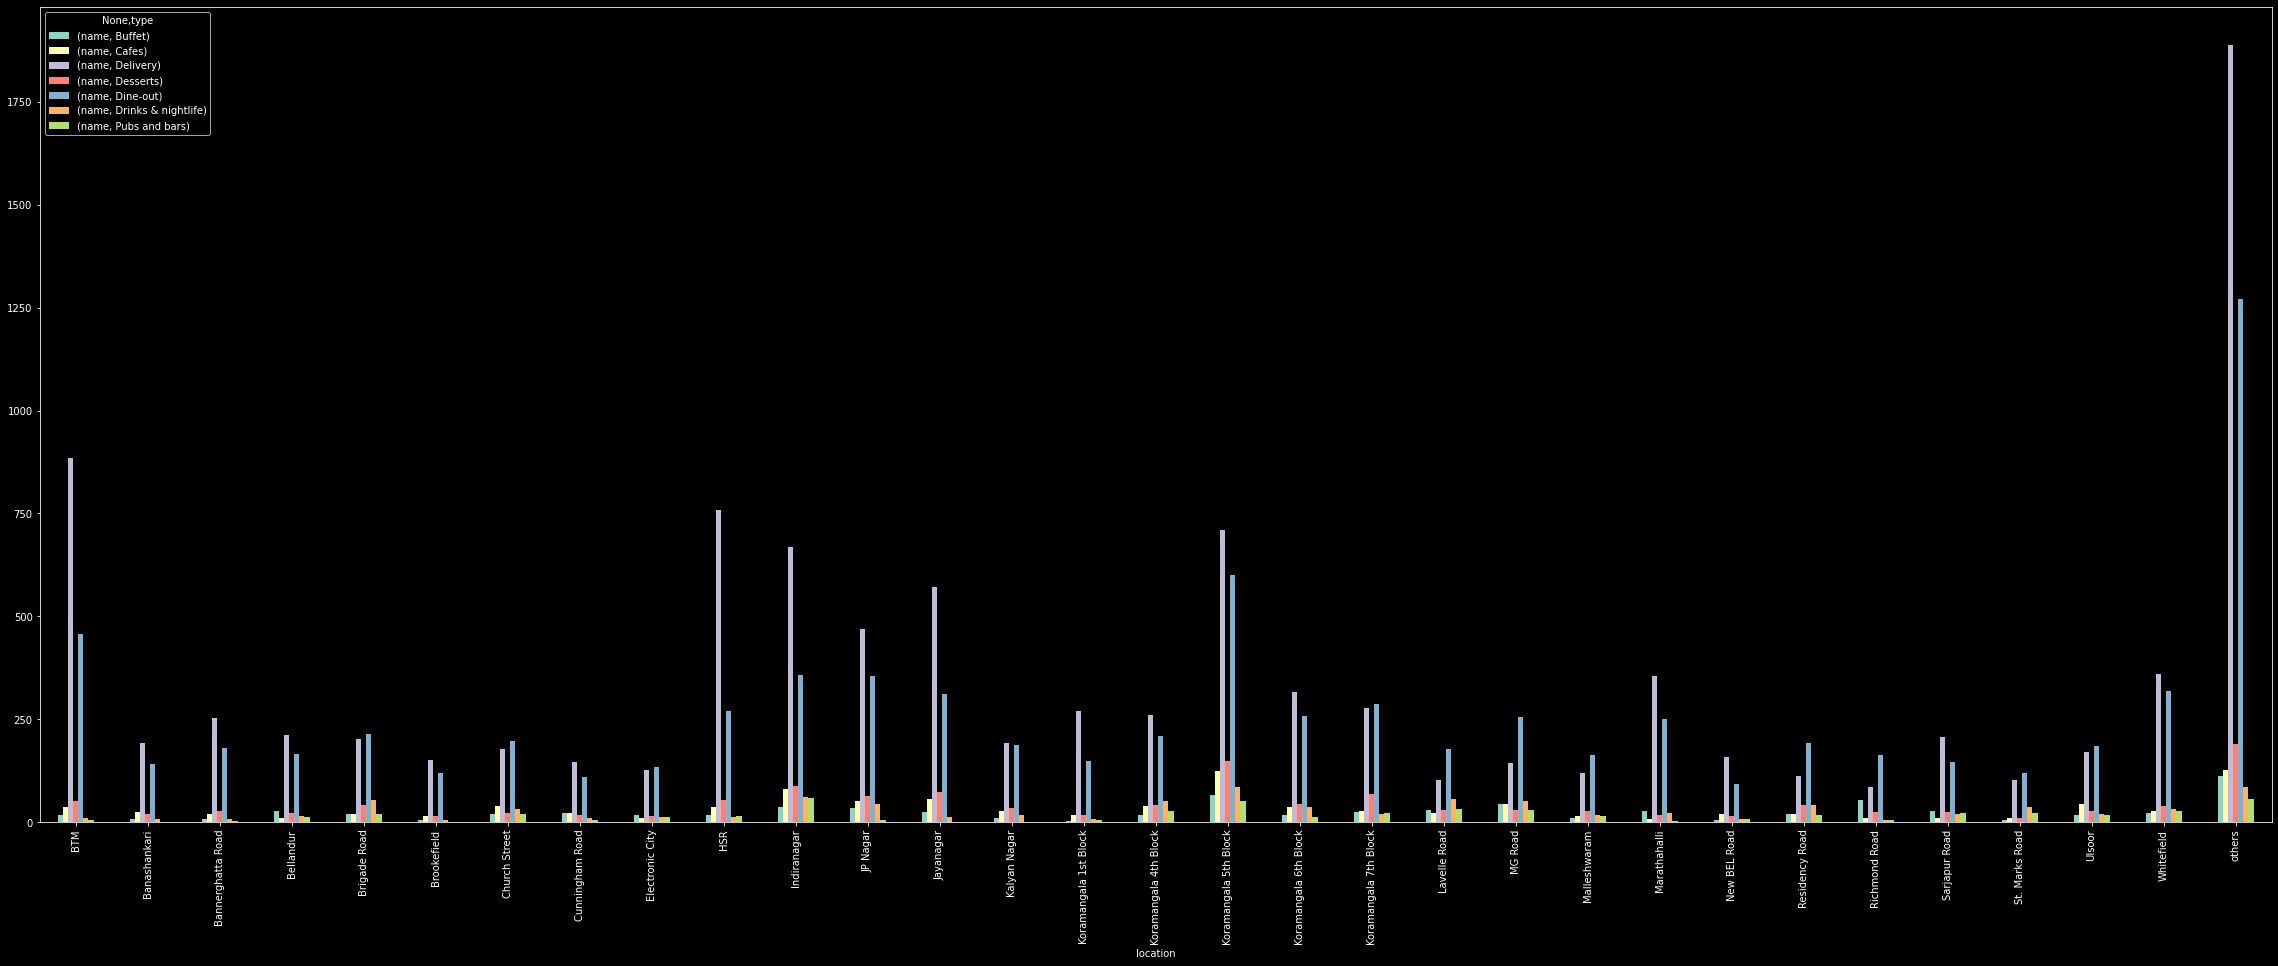

In [60]:
data3.plot(kind="bar", figsize=(40,15))


#No.of votes, location wise

In [61]:
data4=data[['location', 'votes']]
data4.drop_duplicates()
data5=data4.groupby(['location'])['votes'].sum()
data5=data5.to_frame()
data5=data5.sort_values('votes', ascending=False)
data5.head()

,votes
location,
Koramangala 5th Block,2197617
others,1213964
Indiranagar,1150323
Koramangala 4th Block,656372
Church Street,593580


above are the votes, location wise

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

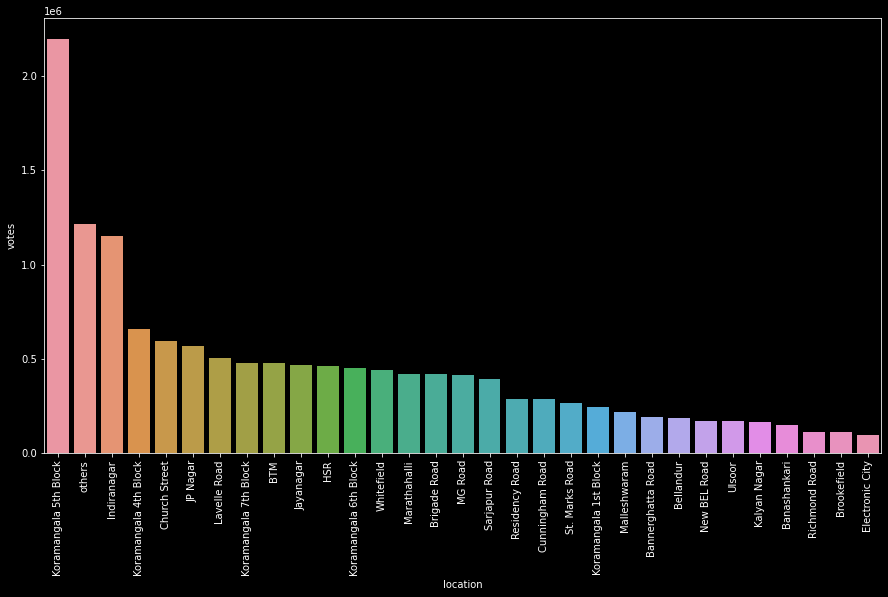

In [62]:
plt.figure(figsize=(15,8))
sns.barplot(data5.index, data5["votes"])
plt.xticks(rotation=90)

above one says about the location wise customers interest in voting or giving feed back

#visualsing top cuisines

In [63]:
data6= data[['cuisines', 'votes']]
data6.drop_duplicates()
data7=data6.groupby(['cuisines'])['votes'].sum()
data7=data7.to_frame()
data7=data7.sort_values('votes', ascending=False)
data7.head()

,votes
cuisines,
others,12092439
North Indian,487386
"North Indian, Chinese",219244
South Indian,143967
"North Indian, Mughlai",102581


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

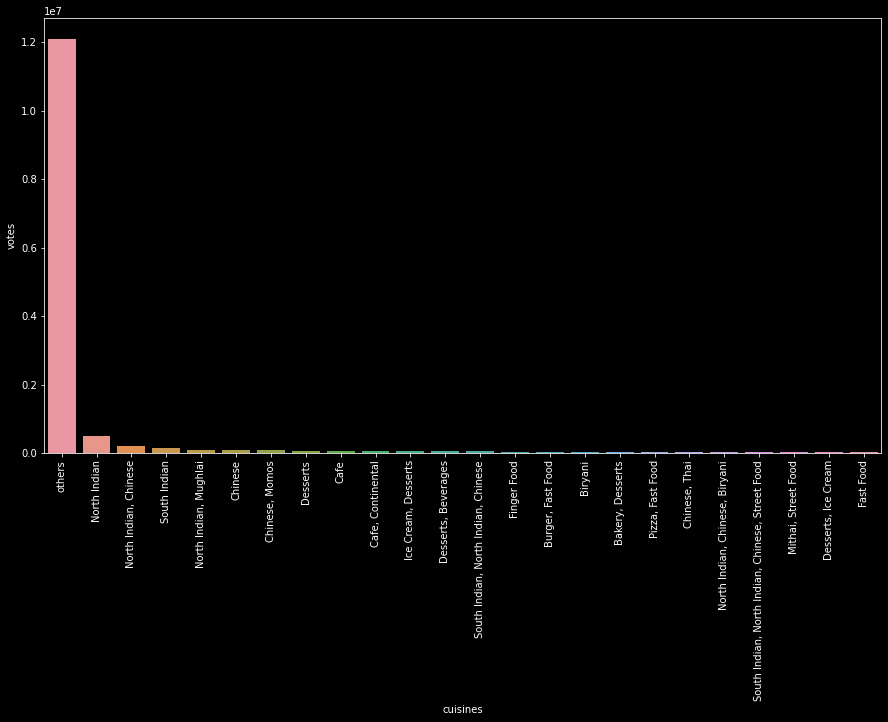

In [64]:
plt.figure(figsize=(15,8))
sns.barplot(data7.index, data7["votes"])
plt.xticks(rotation=90)

In [65]:
#removing others 
data7=data7.iloc[1:, :]
data7.head()

,votes
cuisines,
North Indian,487386
"North Indian, Chinese",219244
South Indian,143967
"North Indian, Mughlai",102581
Chinese,98508


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

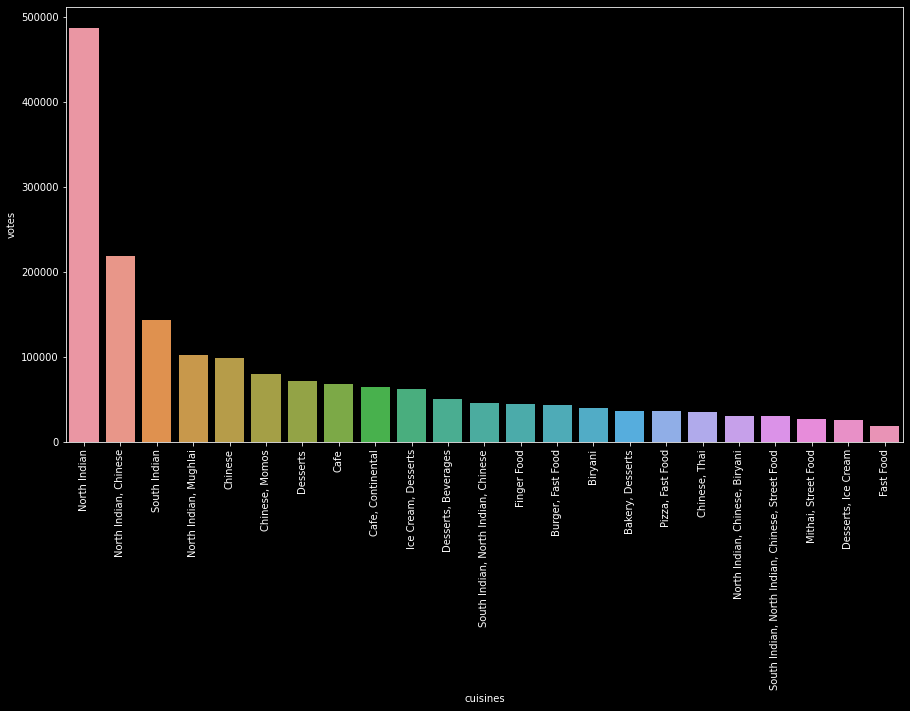

In [66]:
#after removing others
plt.figure(figsize=(15,8))
sns.barplot(data7.index, data7["votes"])
plt.xticks(rotation=90)

Above says highest votes are given to north indian cuisines 

In [67]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,costfor2plates,reviews_list,menu_item,type
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",others,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",others,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,others,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",others,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,others,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,others,Casual Dining,"Panipuri, Gol Gappe",others,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet


#creating a new feature in data

In [68]:
#function to count number of cuisnes
def cuisine_counter(inpStr):
  numcuisines=len(str(inpStr).split(','))
  return(numcuisines)

In [69]:
data['cuisinecount']=data['cuisines'].apply(cuisine_counter)
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,costfor2plates,reviews_list,menu_item,type,cuisinecount
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",others,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",others,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,others,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",others,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,others,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,others,Casual Dining,"Panipuri, Gol Gappe",others,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,1


In above cuisine count is added

#DATA PREPROCESSING

In [70]:
data.isnull().sum()

url               0
address           0
name              0
online_order      0
book_table        0
rate              0
votes             0
phone             0
location          0
rest_type         0
dish_liked        0
cuisines          0
costfor2plates    0
reviews_list      0
menu_item         0
type              0
cuisinecount      0
dtype: int64

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23222 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             23222 non-null  object 
 1   address         23222 non-null  object 
 2   name            23222 non-null  object 
 3   online_order    23222 non-null  object 
 4   book_table      23222 non-null  object 
 5   rate            23222 non-null  float64
 6   votes           23222 non-null  int64  
 7   phone           23222 non-null  object 
 8   location        23222 non-null  object 
 9   rest_type       23222 non-null  object 
 10  dish_liked      23222 non-null  object 
 11  cuisines        23222 non-null  object 
 12  costfor2plates  23222 non-null  float64
 13  reviews_list    23222 non-null  object 
 14  menu_item       23222 non-null  object 
 15  type            23222 non-null  object 
 16  cuisinecount    23222 non-null  int64  
dtypes: float64(2), int64(2), object

In [72]:
data.rename({'approx_cost(for two people)': 'costfor2plates',
               'listed_in(type)':'listed_in_type',
               'listed_in(city)':'listed_in_city'
              }, axis=1, inplace=True)
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'costfor2plates', 'reviews_list', 'menu_item', 'type', 'cuisinecount'],
      dtype='object')

In [73]:
remove_comma = lambda x: int(x.replace(',', '')) if type(x) == np.str and x != np.nan else x 
data.votes = data.votes.astype('int')


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23222 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             23222 non-null  object 
 1   address         23222 non-null  object 
 2   name            23222 non-null  object 
 3   online_order    23222 non-null  object 
 4   book_table      23222 non-null  object 
 5   rate            23222 non-null  float64
 6   votes           23222 non-null  int64  
 7   phone           23222 non-null  object 
 8   location        23222 non-null  object 
 9   rest_type       23222 non-null  object 
 10  dish_liked      23222 non-null  object 
 11  cuisines        23222 non-null  object 
 12  costfor2plates  23222 non-null  float64
 13  reviews_list    23222 non-null  object 
 14  menu_item       23222 non-null  object 
 15  type            23222 non-null  object 
 16  cuisinecount    23222 non-null  int64  
dtypes: float64(2), int64(2), object

In [75]:
data['rate'].unique()

array([4.1       , 3.8       , 3.7       , 4.6       , 4.        ,
       4.2       , 3.9       , 3.        , 3.6       , 2.8       ,
       4.4       , 3.1       , 4.3       , 2.6       , 3.3       ,
       3.5       , 3.2       , 4.5       , 2.5       , 2.9       ,
       3.4       , 2.7       , 4.7       , 3.70044882, 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [76]:
data = data.loc[data.rate !='NEW']
data = data.loc[data.rate !='-'].reset_index(drop=True)

In [77]:
#Now we will remove '/5'
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
data.rate = data.rate.apply(remove_slash).str.strip().astype('float')

AttributeError: ignored

In [78]:
data['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23222 entries, 0 to 23221
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             23222 non-null  object 
 1   address         23222 non-null  object 
 2   name            23222 non-null  object 
 3   online_order    23222 non-null  object 
 4   book_table      23222 non-null  object 
 5   rate            23222 non-null  float64
 6   votes           23222 non-null  int64  
 7   phone           23222 non-null  object 
 8   location        23222 non-null  object 
 9   rest_type       23222 non-null  object 
 10  dish_liked      23222 non-null  object 
 11  cuisines        23222 non-null  object 
 12  costfor2plates  23222 non-null  float64
 13  reviews_list    23222 non-null  object 
 14  menu_item       23222 non-null  object 
 15  type            23222 non-null  object 
 16  cuisinecount    23222 non-null  int64  
dtypes: float64(2), int64(2), object

In [80]:
#Now we see that 'rate' column has converted to float datatype

#Now we will Label Encode the input variable columns into 0,1,2...

def Encode(data):
    for column in data.columns[~data.columns.isin(['rate', 'approx_cost_for_2_people', 'votes'])]:
        data[column] = data[column].factorize()[0]
    return data

new_data = Encode(data.copy())

In [81]:

new_data['rate'] = new_data['rate'].fillna(new_data['rate'].mean())
new_data['costfor2plates'] = new_data['costfor2plates'].fillna(new_data['costfor2plates'].mean())

In [82]:
new_data.isna().sum()

url               0
address           0
name              0
online_order      0
book_table        0
rate              0
votes             0
phone             0
location          0
rest_type         0
dish_liked        0
cuisines          0
costfor2plates    0
reviews_list      0
menu_item         0
type              0
cuisinecount      0
dtype: int64

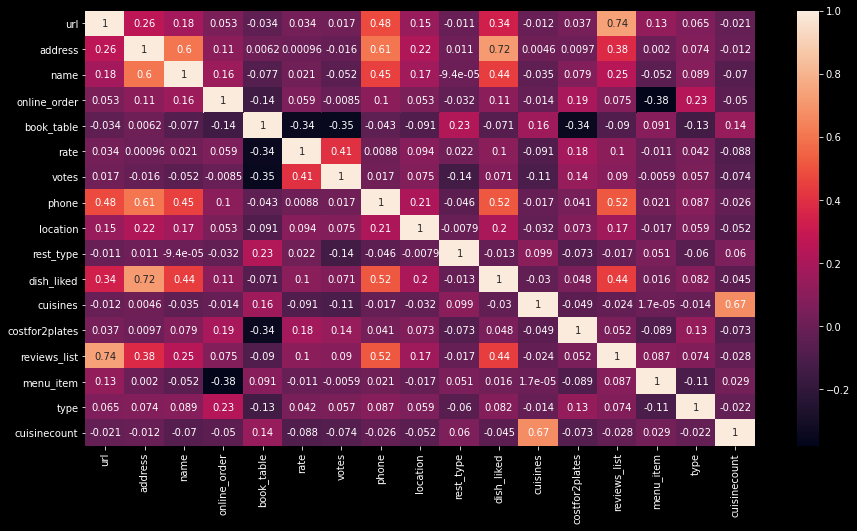

In [83]:

#Checking for correlation among all the x(inputs)

corr = new_data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [93]:
new_data.columns

Index(['name', 'online_order', 'rate', 'votes', 'phone', 'location',
       'rest_type', 'cuisines'],
      dtype='object')

In [97]:
type(new_data)

pandas.core.frame.DataFrame

#Proprocessing Text features


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/zomato.csv')

In [ ]:
from bs4 import BeautifulSoup
# Combining all the above stundents 
from tqdm import tqdm
# tqdm is for printing the status bar
word_counter = []

stop_words = set(stopwords.words('english')) 

def filterised_text(text):
    preprocessed_text = []
    for sentance in tqdm(text):
        sentance = re.sub('[0-9]+', '', sentance)
        sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance)
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        sentance = ' '.join(word.lower() for word in sentance.split() if len(word)>1 and word.lower() not in stop_words)
        sentance = re.sub(r"rated", "", sentance)
        count = len(sentance.split())
        word_counter.append(count)
        preprocessed_text.append(sentance.strip())
    return preprocessed_text



In [ ]:
#reference from github
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    return phrase

In [ ]:
preprocessed_reviews = filterised_text(data['reviews_list'].values)
data['preprocessed_reviews']  = preprocessed_reviews
preprocessed_reviews[1822]

In [ ]:
data.columns

In [ ]:
y = data['rate']
X = data.drop(['rate','reviews_list','cuisines','name'],axis = 1)

In [ ]:
#splitting into x and y into train and test set
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Splitting train set into tr and cv set
x_tr, x_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size = 0.2,random_state = 42)

x_tr_txt = x_tr['preprocessed_reviews']
x_cv_txt = x_cv['preprocessed_reviews']
x_test_txt = x_test['preprocessed_reviews']

print(x_tr_txt.shape,y_tr.shape )
print(x_cv_txt.shape,y_cv.shape )
print(x_test_txt.shape,y_test.shape )

x_tr_txt = x_tr['preprocessed_reviews']
x_cv_txt = x_cv['preprocessed_reviews']
x_test_txt = x_test['preprocessed_reviews']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#reference from medium
count_vect = CountVectorizer(ngram_range=(1,1), min_df=10) 
# train data
X_train_bow = count_vect.fit_transform(x_tr_txt)

# test data
x_cv_bow = count_vect.transform(x_cv_txt)
x_test_bow = count_vect.transform(x_test_txt)


print('X_train_bow',X_train_bow.shape)
print('==='*10)
print('x_cv_bow',x_cv_bow.shape)
print('==='*10)
print('x_test_bow',x_test_bow.shape)

#LSTM MODEL

In [ ]:
X = data['preprocessed_reviews']
y = data['rate']

# split the data set into train and test
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0, shuffle=True)

print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
max_review_length = 600
top_words = 10000


## pass through tokenizer
tk = Tokenizer(lower = True, num_words= top_words)
tk.fit_on_texts(X_train)
X_train_seq = tk.texts_to_sequences(X_train)
## add padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_review_length)
X_test_seq = tk.texts_to_sequences(x_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_review_length)

print('train data shape ', X_train_pad.shape)
print('test data shape', X_test_pad.shape)


In [ ]:
embedding_vecor_length = 256
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(200))  # returns a sequence of vectors of dimension 32
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())